In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from scipy import ndimage

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [3]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

## Hiển thị random ảnh trong tập dữ liệu (train và test)

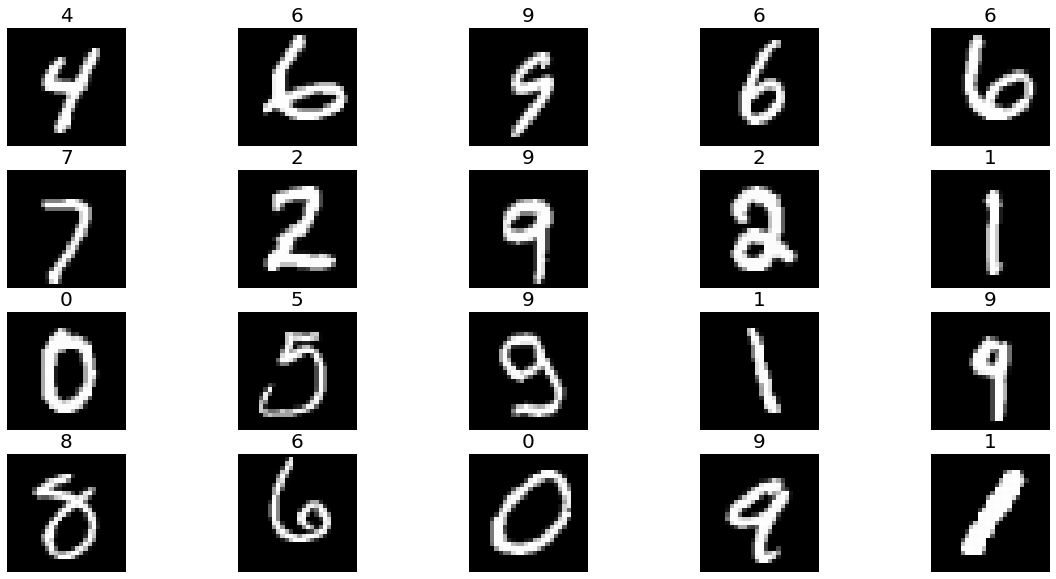

In [5]:
idx = list(np.random.choice(X.shape[0], 20))
plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(X[idx], y[idx])):
    plt.subplot(4, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis("off")
    plt.title(label, fontsize = 20)

In [6]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
 X, y, test_size=1/7.0, random_state=0)

In [7]:
X_train_val.shape

(60000, 784)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(
 X_train_val, y_train_val, test_size=1/6.0, random_state=0)

In [9]:
X_train.shape

(50000, 784)

In [10]:
X_val.shape

(10000, 784)

## Huấn luyện bằng model Logistic Regression trên tập dữ liệu thô ban đầu

In [11]:
start = time.time()
logreg_model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
end = time.time()

full_logreg_time = end-start
print('Time to fit: {}s'.format(full_logreg_time))

preds_train = logreg_model.predict(X_train)
preds_test = logreg_model.predict(X_val)

# Evaluation
print('Train Error: {} %'.format(np.mean(preds_train != y_train)*100))
print('Test Error: {} %'.format(np.mean(preds_test != y_val)*100))

/home/bao/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Time to fit: 49.24395036697388s
Train Error: 6.4079999999999995 %
Test Error: 8.260000000000002 %


## Confusion matrix

In [12]:
pd.crosstab(y_val, preds_test, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,981,0,3,4,3,7,8,2,10,1,1019
1,0,1092,1,3,2,7,2,3,12,2,1124
2,12,10,886,27,8,4,12,15,27,2,1003
3,5,6,16,890,1,36,3,10,24,7,998
4,1,8,5,3,878,1,11,5,10,43,965
5,6,6,3,27,10,815,15,1,39,6,928
6,7,4,8,1,9,16,966,4,5,0,1020
7,1,5,8,5,8,2,1,942,4,33,1009
8,8,9,10,21,3,32,5,5,851,16,960


## Dùng PCA

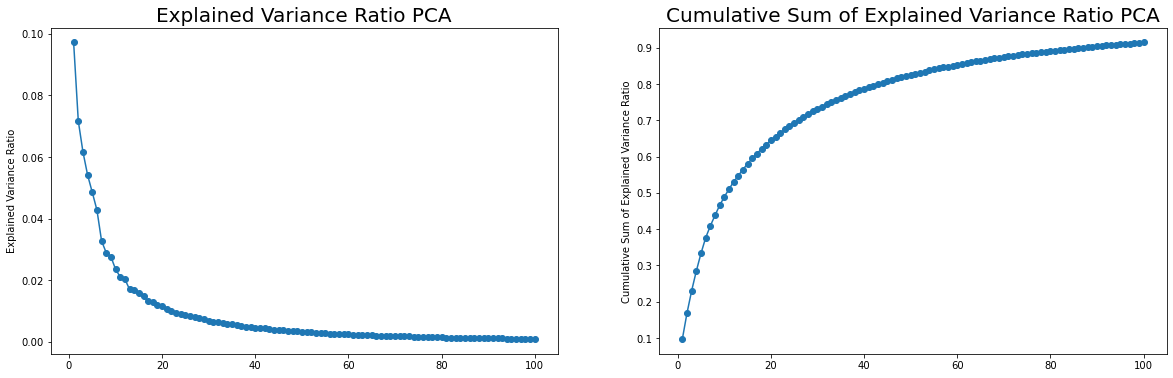

In [13]:
# Do PCA onto our training set and inspect
pca = PCA(n_components=100).fit(X_train)

fig, ax = plt.subplots(ncols=2, figsize=(20,6))
ax1, ax2 = ax.ravel()

ratio = pca.explained_variance_ratio_
ax1.plot(range(1,len(ratio)+1), ratio, 'o-')
ax1.set_title('Explained Variance Ratio PCA', fontsize=20)
ax1.set_ylabel('Explained Variance Ratio')

ratio = pca.explained_variance_ratio_
ax2.plot(range(1,len(ratio)+1), np.cumsum(ratio), 'o-')
ax2.set_title('Cumulative Sum of Explained Variance Ratio PCA', fontsize=20)
ax2.set_ylabel('Cumulative Sum of Explained Variance Ratio');

In [14]:
x_train_pca = pca.transform(X_train)
x_test_pca = pca.transform(X_val)

print(x_train_pca.shape, x_test_pca.shape)

(50000, 100) (10000, 100)


/home/bao/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Time to fit model (100 PCs): 12.028300762176514s
Time to fit model (full dataset): 49.24395036697388s

Train Error (100 PCs): 8.352 %
Test Error (100 PCs): 8.39 %

Train Error (full dataset): 6.4079999999999995 %
Test Error (full dataset): 8.260000000000002 %


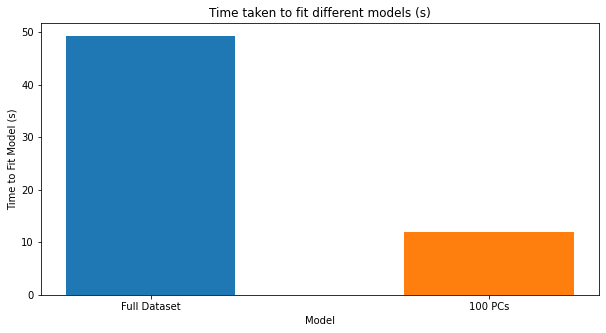

In [15]:
start = time.time()
logreg_model_pca = LogisticRegression(solver='lbfgs').fit(x_train_pca, y_train)
end = time.time()

print('Time to fit model (100 PCs): {}s'.format(end-start))
print('Time to fit model (full dataset): {}s\n'.format(full_logreg_time))

preds_train_pca = logreg_model_pca.predict(x_train_pca)
preds_test_pca = logreg_model_pca.predict(x_test_pca)

# Evaluation
print('Train Error (100 PCs): {} %'.format(np.mean(preds_train_pca != y_train)*100))
print('Test Error (100 PCs): {} %\n'.format(np.mean(preds_test_pca != y_val)*100))

print('Train Error (full dataset): {} %'.format(np.mean(preds_train != y_train)*100))
print('Test Error (full dataset): {} %'.format(np.mean(preds_test != y_val)*100))

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(0, full_logreg_time, width=0.5)
ax.bar(1, end-start, width=0.5)
ax.set_xlabel('Model')
ax.set_xticks([0,1])
ax.set_xticklabels(['Full Dataset', '100 PCs'])
ax.set_ylabel('Time to Fit Model (s)')
ax.set_title('Time taken to fit different models (s)');

## Confusion matrix

In [16]:
pd.crosstab(y_val, preds_test_pca, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,985,0,3,1,5,11,4,0,8,2,1019
1,0,1087,2,4,2,7,2,4,15,1,1124
2,16,14,883,18,14,4,16,16,19,3,1003
3,6,10,15,886,1,32,7,10,19,12,998
4,2,9,5,1,890,0,14,2,6,36,965
5,14,6,7,19,11,822,14,1,26,8,928
6,6,6,3,0,8,10,981,0,6,0,1020
7,2,14,7,3,9,2,1,940,1,30,1009
8,9,21,7,35,8,24,6,8,817,25,960


# Tiền xử lý

### Crop

In [17]:
# Loại bỏ các điểm ảnh ở biên (giá trị 0)
def crop(data):
    data = data.reshape(28,28)
    r = data[~np.all(data == 0, axis=1)] # loại bỏ hàng toàn 0
    idx = np.argwhere(np.all(r[..., :] == 0, axis=0)) # vị trí cột toàn 0
    c = np.delete(r, idx, axis=1) # loại bỏ cột toàn 0
    res = cv2.resize(c, dsize=(28, 28)) # Trả lại về size 28x28
    res = res.flatten() # Chuyển lại thành array 1 chiều như ban đầu
    return res

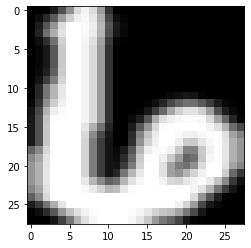

In [18]:
# Xem thử một ảnh sau khi xử lý
data = X_train[0]
res = crop(data)
plt.imshow(res.reshape(28,28), cmap=plt.cm.gray);

In [19]:
X_train_crop = np.apply_along_axis(crop, 1, X_train)
X_test_crop = np.apply_along_axis(crop, 1, X_val)

In [20]:
logreg_crop_model = LogisticRegression(solver='lbfgs').fit(X_train_crop, y_train)
preds_train_crop = logreg_crop_model.predict(X_train_crop)
preds_test_crop = logreg_crop_model.predict(X_test_crop)

# Evaluation
print('Train Error (before): {} %'.format(np.mean(preds_train != y_train)*100))
print('Test Error (before): {} %\n'.format(np.mean(preds_test != y_val)*100))

print('Train Error: {} %'.format(np.mean(preds_train_crop != y_train)*100))
print('Test Error: {} %\n'.format(np.mean(preds_test_crop != y_val)*100))

/home/bao/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Error (before): 6.4079999999999995 %
Test Error (before): 8.260000000000002 %

Train Error: 5.6579999999999995 %
Test Error: 6.63 %



### Scale

In [21]:
def cropData(data):
    return np.apply_along_axis(crop, 1, data)

In [22]:
scale = StandardScaler()

In [23]:
X_train_full = scale.fit_transform(X_train)
X_test_full = scale.fit_transform(X_val)

In [24]:
logreg_scale_model = LogisticRegression(solver='lbfgs').fit(X_train_full, y_train)
preds_train_scale = logreg_scale_model.predict(X_train_full)
preds_test_scale = logreg_scale_model.predict(X_test_full)

# Evaluation
print('Train Error (before): {} %'.format(np.mean(preds_train != y_train)*100))
print('Test Error (before): {} %\n'.format(np.mean(preds_test != y_val)*100))

print('Train Error: {} %'.format(np.mean(preds_train_scale != y_train)*100))
print('Test Error: {} %\n'.format(np.mean(preds_test_scale != y_val)*100))

/home/bao/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Error (before): 6.4079999999999995 %
Test Error (before): 8.260000000000002 %

Train Error: 5.3740000000000006 %
Test Error: 8.76 %

